### read multiple screening result csv files in one df

In [489]:
import pandas as pd
import glob
import sklearn
from sklearn import preprocessing
import joblib

In [490]:
#read and combine screening result of four models, all of them are with proba more then 0.7

for i in [1, 2, 5, 6]:
    
    csv_files = glob.glob(f"./*model{i}_screen.csv")
    df_list = [pd.read_csv(filename) for filename in csv_files]

    exec(f"df{i} = pd.concat(df_list, ignore_index=True)")
    

In [491]:
len(df1), len(df2), len(df5), len(df6)

(9835, 77902, 38362, 1041)

In [492]:
df1 = df1.rename(columns= {'Predicted_result': 'model1_proba'})
df2 = df2.rename(columns= {'Predicted_result': 'model2_proba'})
df3 = df5.rename(columns= {'Predicted_result': 'model3_proba'})
df4 = df6.rename(columns= {'Predicted_result': 'model4_proba'})

In [493]:
for i in range(1, 5):
    # Sort the data frame by the 'model{i}_proba' column in descending order and take the top 200 rows
    df = globals()[f"df{i}"].sort_values(f"model{i}_proba", ascending=False).head(250)
    
    # Assign the sorted and filtered data frame to a new variable
    globals()[f"df{i}_sorted"] = df


In [494]:
hit_collection = pd.concat([df1_sorted, df2_sorted, df3_sorted, df4_sorted])

In [495]:
model1 = joblib.load('chembl_morgan2fp.joblib')
model2 = joblib.load('chembl_rdkit2D_maxfeatures_none.joblib')
model3 = joblib.load('pubchem_morgan2fp_newset_fullset_smote.joblib')
model4 = joblib.load('pubchem_rdkit2D_newset_fullset_smote.joblib')

In [496]:
desc_cols = list(hit_collection.iloc[:, 6:214].columns)
X = hit_collection[desc_cols]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

model= model2
predictions_proba = model.predict_proba(X_scaled)[:, 1]
hit_collection['model2_proba'] = predictions_proba

model= model4
predictions_proba = model.predict_proba(X_scaled)[:, 1]
hit_collection['model4_proba'] = predictions_proba
    

In [497]:
morgan2_cols = ['morgan2_b'+str(i) for i in list(range(2048))]
X = hit_collection[morgan2_cols]

model= model1
predictions_proba = model.predict_proba(X)[:, 1]
hit_collection['model1_proba'] = predictions_proba

model= model3
predictions_proba = model.predict_proba(X)[:, 1]
hit_collection['model3_proba'] = predictions_proba

In [498]:
hit_collection_useful = hit_collection[['preprocessedSmiles','MOLPORTID', 'model1_proba',  'model2_proba',  'model3_proba',  'model4_proba'  ]]

In [499]:
hit_collection_useful = hit_collection_useful.reset_index()
hit_collection_useful

,index,preprocessedSmiles,MOLPORTID,model1_proba,model2_proba,model3_proba,model4_proba
0,5291,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,MolPort-023-276-728,1.000000,0.694748,0.212000,0.561500
1,6760,Cc1cc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)c(Cl)cc1F,MolPort-046-178-350,0.994000,0.923454,0.238000,0.535667
2,6799,COc1ccc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)cc1Cl,MolPort-046-185-085,0.989000,0.916495,0.253000,0.534667
3,3337,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,MolPort-000-121-470,0.985000,0.715748,0.269000,0.239000
4,3911,COc1cc(S(=O)(=O)NCCCn2ccnc2)ccc1Cl,MolPort-000-686-469,0.981000,0.701454,0.326000,0.339000
...,...,...,...,...,...,...,...
995,996,N#Cc1ccc(OCOc2ccc(C#N)cc2)cc1,MolPort-002-891-107,0.549448,0.596000,0.853000,0.357642
996,198,Clc1ccc(OCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-146-942,0.276025,0.492606,0.851286,0.441702
997,193,Clc1ccc(OCCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-146-834,0.276025,0.474530,0.851286,0.449869
998,1026,Clc1ccc(OCCCCCCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-914-905,0.276025,0.465537,0.851286,0.478750


In [500]:
hit_collection_useful.drop_duplicates('MOLPORTID', inplace=False)

,index,preprocessedSmiles,MOLPORTID,model1_proba,model2_proba,model3_proba,model4_proba
0,5291,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,MolPort-023-276-728,1.000000,0.694748,0.212000,0.561500
1,6760,Cc1cc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)c(Cl)cc1F,MolPort-046-178-350,0.994000,0.923454,0.238000,0.535667
2,6799,COc1ccc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)cc1Cl,MolPort-046-185-085,0.989000,0.916495,0.253000,0.534667
3,3337,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,MolPort-000-121-470,0.985000,0.715748,0.269000,0.239000
4,3911,COc1cc(S(=O)(=O)NCCCn2ccnc2)ccc1Cl,MolPort-000-686-469,0.981000,0.701454,0.326000,0.339000
...,...,...,...,...,...,...,...
995,996,N#Cc1ccc(OCOc2ccc(C#N)cc2)cc1,MolPort-002-891-107,0.549448,0.596000,0.853000,0.357642
996,198,Clc1ccc(OCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-146-942,0.276025,0.492606,0.851286,0.441702
997,193,Clc1ccc(OCCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-146-834,0.276025,0.474530,0.851286,0.449869
998,1026,Clc1ccc(OCCCCCCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-914-905,0.276025,0.465537,0.851286,0.478750


### cluster with similarity

In [501]:
from tqdm.auto import tqdm
from rdkit.ML.Cluster import Butina
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [502]:
#meeded in cluter with butina function
def tanimoto_distance_matrix(fp_list):
    """
    Calculate distance matrix for fingerprint list.
    Copy pasted form Reference (see top of the notebook).
    """
    dissimilarity_matrix = []
    for i in tqdm(range(1, len(fp_list))):
        # Compare the current fingerprint against all the previous ones in the list
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [503]:
#Group the results with tanimoto similarity by butina
#cluster with butina

def cluster_fingerprints(fp_list, cutoff=0.3):
    """
    Cluster fingerprints using Butina:
    given the input distance matrix cluster together all the
    molecules with a distance <= cutoff.
    e.g.: if cutoff == 0.3 the molecules with tanimoto >= 0.7
    will be clustered together.

    Returns a list of tuples where each tuple is a cluster
    and each value in the tuple correspond to the fingerprint
    index in the fingerprints list.

    Copy pasted from the Reference (see top of the notebook)
    """
    # Calculate Tanimoto distance matrix
    print("Computing distance matrix . . .")
    distance_matrix = tanimoto_distance_matrix(fp_list)
    # Cluster the data with the implemented Butina algorithm.
    print("Computing clusters . . .")
    clusters = Butina.ClusterData(distance_matrix, len(fp_list), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True) # Sort the list of clusters in descending order.
    print("Clusters computed!")
    return clusters



In [504]:
smiles = hit_collection_useful['preprocessedSmiles']
# Get only the values from the series.
smiles_array = smiles.values
print("# of unique smiles:", len(smiles_array))


fingerprints_list = []
for smi in tqdm(smiles):
    mol = Chem.MolFromSmiles(smi) # get mol object
    fps = AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)
    fingerprints_list.append(fps)

# of unique smiles: 1000


100%|██████████| 1000/1000 [00:00<00:00, 5534.11it/s]


In [505]:
clusters = cluster_fingerprints(fingerprints_list)

Computing distance matrix . . .


100%|██████████| 999/999 [00:00<00:00, 8922.76it/s]


Computing clusters . . .
Clusters computed!


In [506]:
len(clusters)

597

In [507]:
clusters

[(58, 3, 5, 6, 24, 26, 27, 28, 44, 52, 54, 61, 68, 87, 88, 168, 201),
 (783,
  778,
  779,
  781,
  782,
  854,
  855,
  856,
  857,
  858,
  859,
  860,
  861,
  862,
  864,
  896),
 (767, 750, 751, 752, 753, 755, 756, 757, 758, 761, 763, 764),
 (522, 504, 512, 537, 579, 597, 619, 630, 639, 703, 704, 712),
 (994, 879, 880, 941, 942, 943, 944, 945, 952, 953, 993),
 (915, 807, 808, 809, 810, 811, 812, 813, 822, 913, 914),
 (833, 771, 773, 774, 775, 802, 828, 829, 830, 831, 832),
 (509, 519, 542, 544, 601, 651, 654, 655, 667, 674, 695),
 (799, 790, 791, 792, 793, 794, 795, 796, 797, 798),
 (786, 48, 49, 50, 768, 769, 770, 777, 827, 863),
 (606, 513, 520, 580, 581, 640, 676, 699, 732),
 (17, 4, 10, 11, 12, 15, 22, 117),
 (381, 326, 367, 369, 380, 384, 405, 498),
 (7, 8, 9, 14, 16, 37, 57),
 (657, 508, 621, 631, 649, 653, 678),
 (397, 283, 295, 314, 334, 345, 357),
 (110, 18, 53, 56, 60, 101),
 (483, 40, 89, 228, 242, 324),
 (984, 978, 979, 981, 982, 983),
 (804, 754, 759, 760, 762, 766),


In [508]:
for i in range(0, len(clusters)):
    for j in range(0, len(clusters[i])):
        ind = clusters[i][j]
        hit_collection_useful.loc[ind, 'cluster_id'] = i


In [509]:
hit_collection_useful

,index,preprocessedSmiles,MOLPORTID,model1_proba,model2_proba,model3_proba,model4_proba,cluster_id
0,5291,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,MolPort-023-276-728,1.000000,0.694748,0.212000,0.561500,596.0
1,6760,Cc1cc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)c(Cl)cc1F,MolPort-046-178-350,0.994000,0.923454,0.238000,0.535667,595.0
2,6799,COc1ccc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)cc1Cl,MolPort-046-185-085,0.989000,0.916495,0.253000,0.534667,594.0
3,3337,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,MolPort-000-121-470,0.985000,0.715748,0.269000,0.239000,0.0
4,3911,COc1cc(S(=O)(=O)NCCCn2ccnc2)ccc1Cl,MolPort-000-686-469,0.981000,0.701454,0.326000,0.339000,11.0
...,...,...,...,...,...,...,...,...
995,996,N#Cc1ccc(OCOc2ccc(C#N)cc2)cc1,MolPort-002-891-107,0.549448,0.596000,0.853000,0.357642,192.0
996,198,Clc1ccc(OCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-146-942,0.276025,0.492606,0.851286,0.441702,24.0
997,193,Clc1ccc(OCCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-146-834,0.276025,0.474530,0.851286,0.449869,24.0
998,1026,Clc1ccc(OCCCCCCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-914-905,0.276025,0.465537,0.851286,0.478750,24.0


### calculate similarity with known actives and inactives

In [510]:
#read active and inactive datas
chembl = pd.read_csv('./IC50_pChembl_value_preprocessed_withoutdescriptor.csv')
pubchem = pd.read_csv('./pubchem_value_preprocessed_withoutdescriptor.csv')

In [511]:
pubchem = pubchem.rename(columns={'PUBCHEM_ACTIVITY_OUTCOME': 'activity_classification'})
pubchem = pubchem.rename(columns={'PUBCHEM_SID': 'id'})
chembl = chembl.rename(columns={'Molecule ChEMBL ID': 'id'})
chembl = chembl.drop('pChEMBL Value', axis=1)

In [512]:
from rdkit import DataStructs

In [513]:
#used in the next function
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [514]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import MolFromSmiles,AllChem,Descriptors
from rdkit.Chem import Draw

In [515]:
def similarity_between(df,top):
    PandasTools.AddMoleculeColumnToFrame(df,'preprocessedSmiles','Molecule')
    
    df_smis = list(df.preprocessedSmiles)
    df_activity = list(df.activity_classification)
    df_fps = [AllChem.GetMorganFingerprintAsBitVect(m,2,nBits=2048) for m in list(df.Molecule)]
    
    def closest_compound(row):
        m = Chem.MolFromSmiles(row.preprocessedSmiles)
        fp = AllChem.GetMorganFingerprintAsBitVect(m,2,nBits=2048)
        s = DataStructs.BulkTanimotoSimilarity(fp, df_fps)
        max_s = max(s)
        max_index = s.index(max_s)
        return [max_s,df_smis[max_index],df_activity[max_index]]
    
    name = get_df_name(df)
    top['closest_compound_inf'] = top.apply(lambda row:closest_compound(row),axis=1)
    top[['similairty_'+name,'closest_'+name+'_smiles','closest_'+name+'_activity']] = top.closest_compound_inf.to_list()
    del top['closest_compound_inf']

In [516]:
similarity_between(chembl,hit_collection_useful)
similarity_between(pubchem,hit_collection_useful)

In [517]:
hit_collection_useful

,index,preprocessedSmiles,MOLPORTID,model1_proba,model2_proba,model3_proba,model4_proba,cluster_id,similairty_chembl,closest_chembl_smiles,closest_chembl_activity,similairty_pubchem,closest_pubchem_smiles,closest_pubchem_activity
0,5291,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,MolPort-023-276-728,1.000000,0.694748,0.212000,0.561500,596.0,1.000000,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,active,0.280000,CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1,Inactive
1,6760,Cc1cc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)c(Cl)cc1F,MolPort-046-178-350,0.994000,0.923454,0.238000,0.535667,595.0,0.704918,Cc1cc(F)ccc1S(=O)(=O)N1CCCC(Cn2ccnc2)C1,active,0.255814,CS(=O)(=O)c1ccc(C(CC2CCCC2)C(=O)Nc2cnccn2)cc1Cl,Inactive
2,6799,COc1ccc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)cc1Cl,MolPort-046-185-085,0.989000,0.916495,0.253000,0.534667,594.0,0.842105,COc1ccc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)cc1OC,active,0.303797,CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)ccc1OC,Inactive
3,3337,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,MolPort-000-121-470,0.985000,0.715748,0.269000,0.239000,0.0,1.000000,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,active,0.294118,CCN(CC)CCNC(=O)c1cc(S(C)(=O)=O)ccc1OC,Inactive
4,3911,COc1cc(S(=O)(=O)NCCCn2ccnc2)ccc1Cl,MolPort-000-686-469,0.981000,0.701454,0.326000,0.339000,11.0,0.754717,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,active,0.308824,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,N#Cc1ccc(OCOc2ccc(C#N)cc2)cc1,MolPort-002-891-107,0.549448,0.596000,0.853000,0.357642,192.0,0.410256,N#Cc1ccc(Cn2cc(COc3ccc(C#N)cc3)nn2)cc1,inactive,0.342857,CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1,Inactive
996,198,Clc1ccc(OCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-146-942,0.276025,0.492606,0.851286,0.441702,24.0,0.375000,Clc1ccc(OCc2cn(Cc3ccccc3)nn2)cc1,inactive,0.482759,N=C(N)c1ccc(OCCCCCOc2ccc(C(=N)N)cc2)cc1,Active
997,193,Clc1ccc(OCCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-146-834,0.276025,0.474530,0.851286,0.449869,24.0,0.375000,Clc1ccc(OCc2cn(Cc3ccccc3)nn2)cc1,inactive,0.482759,N=C(N)c1ccc(OCCCCCOc2ccc(C(=N)N)cc2)cc1,Active
998,1026,Clc1ccc(OCCCCCCCCCCOc2ccc(Cl)cc2)cc1,MolPort-002-914-905,0.276025,0.465537,0.851286,0.478750,24.0,0.375000,Clc1ccc(OCc2cn(Cc3ccccc3)nn2)cc1,inactive,0.482759,N=C(N)c1ccc(OCCCCCOc2ccc(C(=N)N)cc2)cc1,Active


In [518]:
#add logP
#calculate mw
import physicochem_properties_for_pca
from rdkit.Chem import Descriptors

PandasTools.AddMoleculeColumnToFrame(hit_collection_useful,'preprocessedSmiles','Molecule_our_predicted_hits')
PandasTools.AddMoleculeColumnToFrame(hit_collection_useful,'closest_pubchem_smiles','closest_pubchem_smiles_Molecule')
PandasTools.AddMoleculeColumnToFrame(hit_collection_useful,'closest_chembl_smiles','closest_chembl_smiles_Molecule')


In [519]:
def cal_mw(mol):
    return round(Descriptors.MolWt(mol), 3)

hit_collection_useful['mw'] = hit_collection_useful.Molecule_our_predicted_hits.apply(cal_mw)
def cal_logP(mol):
    return round(Descriptors.MolLogP(mol), 3)

hit_collection_useful['logP'] = hit_collection_useful.Molecule_our_predicted_hits.apply(cal_logP)

In [520]:
from rdkit.Chem import Lipinski

def num_of_h_acceptors_and_donors(mol, acc=True):
    if acc:
        return Lipinski.NumHAcceptors(mol)
    else:
        return Lipinski.NumHDonors(mol)
hit_collection_useful['HBA'] = hit_collection_useful['Molecule_our_predicted_hits'].apply(num_of_h_acceptors_and_donors, args=(True,))
hit_collection_useful['HBD'] = hit_collection_useful['Molecule_our_predicted_hits'].apply(num_of_h_acceptors_and_donors, args=(False,))


### Filters

In [521]:
#add filtering steps for linpinski rule of five
hit_collection_useful = hit_collection_useful.loc[(hit_collection_useful['mw']<=500)]
hit_collection_useful = hit_collection_useful.loc[(hit_collection_useful['logP']<=5)]
hit_collection_useful = hit_collection_useful.loc[(hit_collection_useful['HBA']<=10)]
hit_collection_useful = hit_collection_useful.loc[(hit_collection_useful['HBD']<=5)]

,index,preprocessedSmiles,MOLPORTID,model1_proba,model2_proba,model3_proba,model4_proba,cluster_id,similairty_chembl,closest_chembl_smiles,...,similairty_pubchem,closest_pubchem_smiles,closest_pubchem_activity,Molecule_our_predicted_hits,closest_pubchem_smiles_Molecule,closest_chembl_smiles_Molecule,mw,logP,HBA,HBD
0,5291,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,MolPort-023-276-728,1.000000,0.694748,0.212,0.561500,596.0,1.000000,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,...,0.280000,CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1,Inactive,,,,354.211,3.382,5,0
1,6760,Cc1cc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)c(Cl)cc1F,MolPort-046-178-350,0.994000,0.923454,0.238,0.535667,595.0,0.704918,Cc1cc(F)ccc1S(=O)(=O)N1CCCC(Cn2ccnc2)C1,...,0.255814,CS(=O)(=O)c1ccc(C(CC2CCCC2)C(=O)Nc2cnccn2)cc1Cl,Inactive,,,,371.865,3.085,4,0
2,6799,COc1ccc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)cc1Cl,MolPort-046-185-085,0.989000,0.916495,0.253,0.534667,594.0,0.842105,COc1ccc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)cc1OC,...,0.303797,CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)ccc1OC,Inactive,,,,369.874,2.646,5,0
3,3337,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,MolPort-000-121-470,0.985000,0.715748,0.269,0.239000,0.0,1.000000,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,...,0.294118,CCN(CC)CCNC(=O)c1cc(S(C)(=O)=O)ccc1OC,Inactive,,,,309.391,1.569,5,1
4,3911,COc1cc(S(=O)(=O)NCCCn2ccnc2)ccc1Cl,MolPort-000-686-469,0.981000,0.701454,0.326,0.339000,11.0,0.754717,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,...,0.308824,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,Active,,,,329.809,1.914,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,149,Cc1cccc[n+]1CCCCCCCCCC[n+]1ccccc1C,MolPort-002-041-831,0.132423,0.431632,0.854,0.669000,193.0,0.191489,CCCCCCCc1cn(Cc2ccccc2)nn1,...,0.375000,CCCCCCCCCCCCCC[n+]1ccc(C)cc1,Active,,,,326.528,4.699,0,0
993,131,O=C1CCCCCCCCCCCC(=O)OCCO1,MolPort-001-917-574,0.295479,0.476119,0.854,0.383000,4.0,0.200000,NS(=O)(=O)Oc1ccc2c3c(c(=O)oc2c1)CCCCC3,...,1.000000,O=C1CCCCCCCCCCCC(=O)OCCO1,Active,,,,270.369,3.378,4,0
994,224,O=C1CCCCCCCCCCC(=O)OCCO1,MolPort-002-171-572,0.295479,0.496826,0.854,0.371200,4.0,0.200000,NS(=O)(=O)Oc1ccc2c3c(c(=O)oc2c1)CCCCC3,...,1.000000,O=C1CCCCCCCCCCCC(=O)OCCO1,Active,,,,256.342,2.987,4,0
995,996,N#Cc1ccc(OCOc2ccc(C#N)cc2)cc1,MolPort-002-891-107,0.549448,0.596000,0.853,0.357642,192.0,0.410256,N#Cc1ccc(Cn2cc(COc3ccc(C#N)cc3)nn2)cc1,...,0.342857,CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1,Inactive,,,,250.257,2.845,4,0

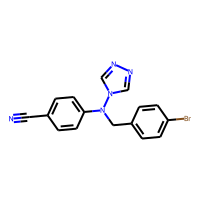
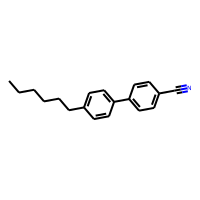
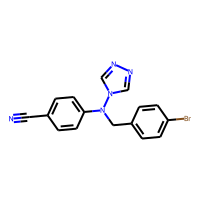
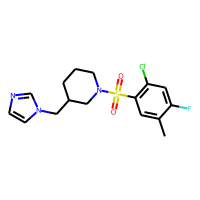
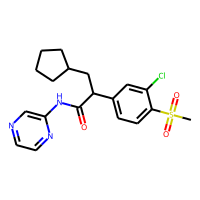
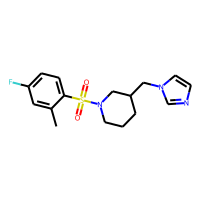
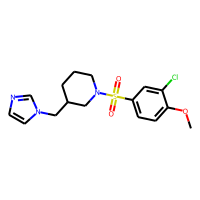
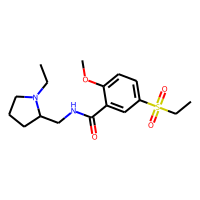
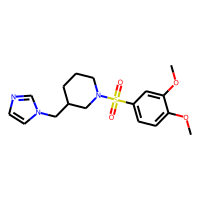
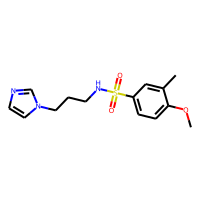
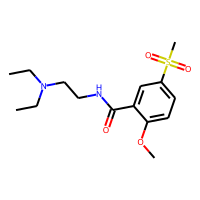
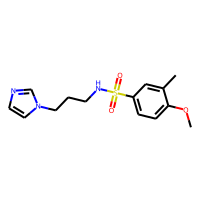
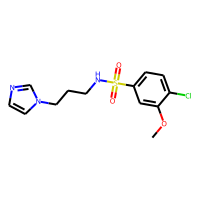
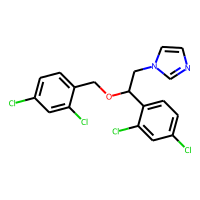
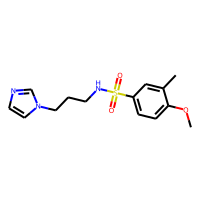
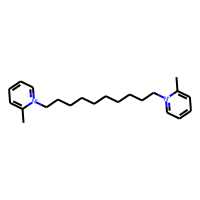
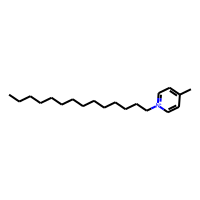
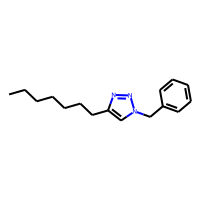
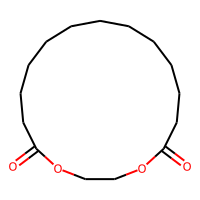
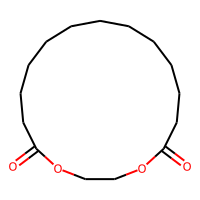
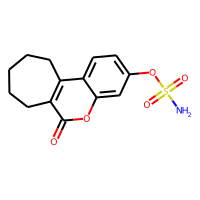
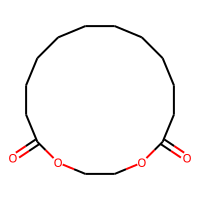
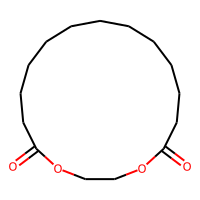
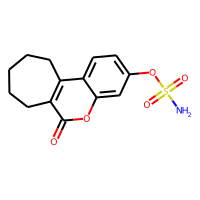
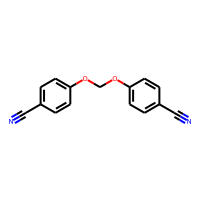
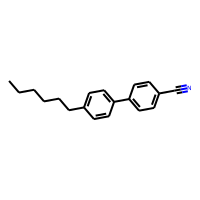
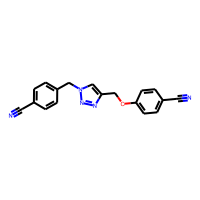
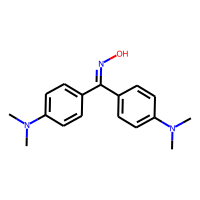
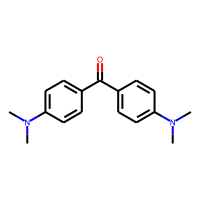
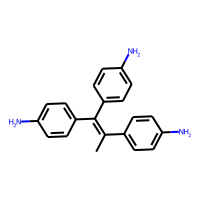

In [522]:
hit_collection_useful

In [523]:
#remove long alkanes
hit_collection_useful_fitered = hit_collection_useful[~hit_collection_useful['preprocessedSmiles'].str.contains('CCCCCCC')]
removed_data = hit_collection_useful[hit_collection_useful['preprocessedSmiles'].str.contains('CCCCCCC')]

In [524]:
#remove sulfone 
hit_collection_useful_fitered2 = hit_collection_useful_fitered[~hit_collection_useful_fitered['preprocessedSmiles'].str.contains('S\(=O\)\(=O\)')]
removed_data = hit_collection_useful_fitered[hit_collection_useful_fitered['preprocessedSmiles'].str.contains('S\(=O\)\(=O\)')]

,index,preprocessedSmiles,MOLPORTID,model1_proba,model2_proba,model3_proba,model4_proba,cluster_id,similairty_chembl,closest_chembl_smiles,...,similairty_pubchem,closest_pubchem_smiles,closest_pubchem_activity,Molecule_our_predicted_hits,closest_pubchem_smiles_Molecule,closest_chembl_smiles_Molecule,mw,logP,HBA,HBD
1,6760,Cc1cc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)c(Cl)cc1F,MolPort-046-178-350,0.994000,0.923454,0.238000,0.535667,595.0,0.704918,Cc1cc(F)ccc1S(=O)(=O)N1CCCC(Cn2ccnc2)C1,...,0.255814,CS(=O)(=O)c1ccc(C(CC2CCCC2)C(=O)Nc2cnccn2)cc1Cl,Inactive,,,,371.865,3.085,4,0
2,6799,COc1ccc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)cc1Cl,MolPort-046-185-085,0.989000,0.916495,0.253000,0.534667,594.0,0.842105,COc1ccc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)cc1OC,...,0.303797,CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)ccc1OC,Inactive,,,,369.874,2.646,5,0
3,3337,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,MolPort-000-121-470,0.985000,0.715748,0.269000,0.239000,0.0,1.000000,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,...,0.294118,CCN(CC)CCNC(=O)c1cc(S(C)(=O)=O)ccc1OC,Inactive,,,,309.391,1.569,5,1
4,3911,COc1cc(S(=O)(=O)NCCCn2ccnc2)ccc1Cl,MolPort-000-686-469,0.981000,0.701454,0.326000,0.339000,11.0,0.754717,COc1ccc(S(=O)(=O)NCCCn2ccnc2)cc1C,...,0.308824,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,Active,,,,329.809,1.914,5,1
5,8918,COc1cc(S(=O)(=O)NCCCn2ccnc2)c(C)cc1C,MolPort-004-902-878,0.981000,0.849454,0.317000,0.280000,0.0,0.787234,Cc1cc(C)c(S(=O)(=O)NCCCn2ccnc2)cc1C,...,0.274194,COc1cc(S(=O)(=O)Nc2ccccc2)c(OC)cc1N,Inactive,,,,323.418,1.877,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,39289,Cc1cccc(CS(=O)(=O)N2CCC(c3cncn3C)CC2)c1,MolPort-046-422-156,0.565000,0.857257,0.185333,0.386667,339.0,0.265823,Cc1cccc(COc2ccc3c(Cn4ccnc4)cc(=O)oc3c2)c1,...,0.281690,CN(C)CCc1c[nH]c2ccc(CS(=O)(=O)N3CCCC3)cc12,Inactive,,,,333.457,2.438,4,0
491,21003,COc1ccc(Cl)cc1S(=O)(=O)Nc1ccc(-c2cn3ccccc3n2)cc1,MolPort-000-518-243,0.495709,0.719362,0.122000,0.385000,44.0,0.352941,COc1ccc(S(=O)(=O)Nc2ccc(N=Nc3ccccc3)cc2)c(OC)c1,...,0.387097,COc1cc(S(=O)(=O)Nc2ccccc2)c(OC)cc1N,Inactive,,,,413.886,4.464,5,1
495,14056,COc1cccc(S(=O)(=O)N2CCC(Cn3c(C)cnc3C)C2)c1,MolPort-044-328-571,0.514932,0.891908,0.085167,0.394667,335.0,0.402778,COc1ccc(S(=O)(=O)N2CCCC(Cn3ccnc3)C2)cc1OC,...,0.276923,COc1cnc(NS(=O)(=O)c2ccc(N)cc2)nc1,Inactive,,,,349.456,2.219,5,0
497,21008,COc1ccc(C)cc1S(=O)(=O)Nc1ccc(-c2cn3ccccc3n2)cc1,MolPort-000-518-250,0.503709,0.717655,0.104000,0.369000,44.0,0.358209,COc1ccc(S(=O)(=O)Nc2ccc(N=Nc3ccccc3)cc2)c(OC)c1,...,0.393443,COc1cc(S(=O)(=O)Nc2ccccc2)c(OC)cc1N,Inactive,,,,393.468,4.119,5,1

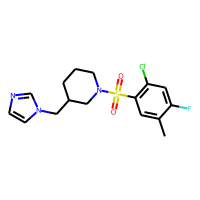
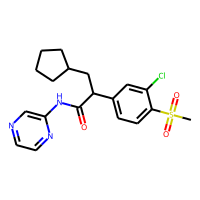
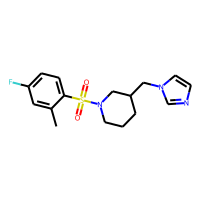
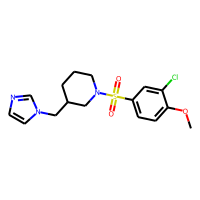
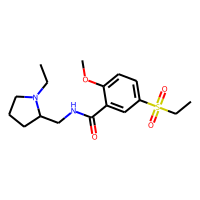
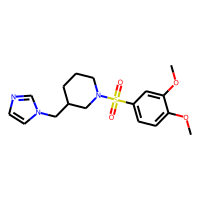
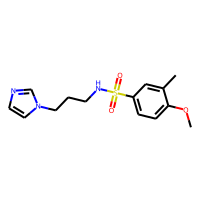
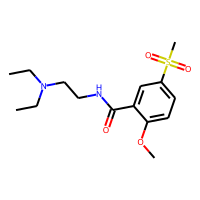
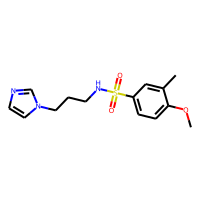
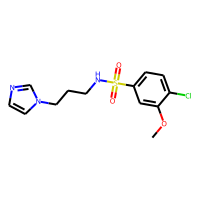
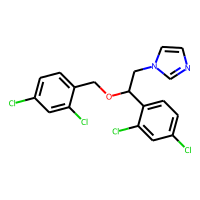
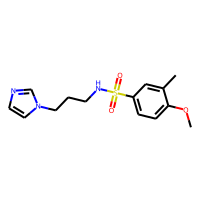
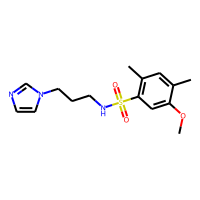
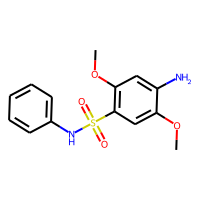
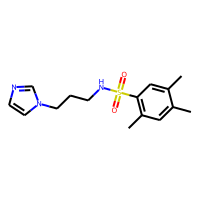
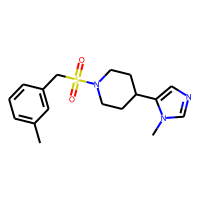
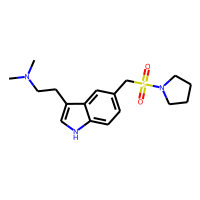
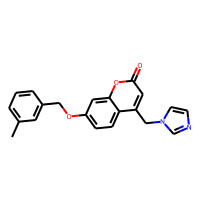
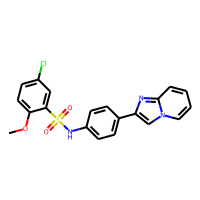
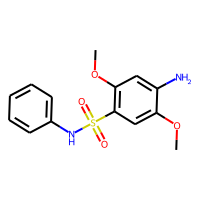
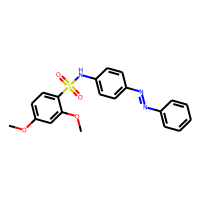
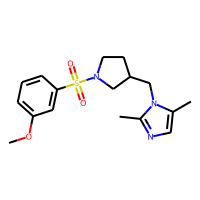
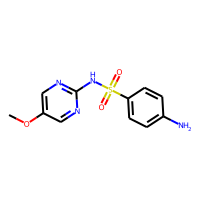
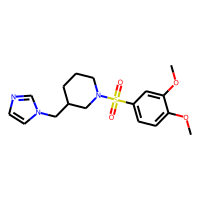
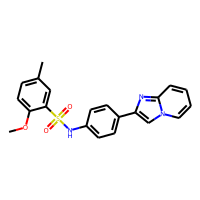
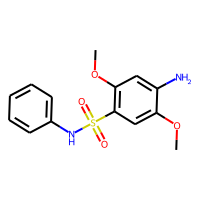
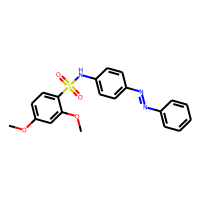
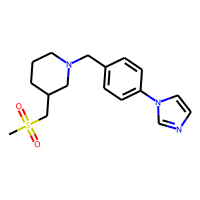
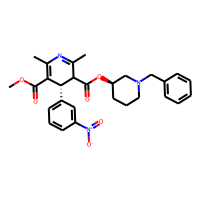
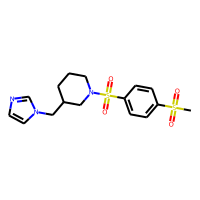

In [525]:
removed_data

In [526]:
len(hit_collection_useful_fitered2)

427

,index,preprocessedSmiles,MOLPORTID,model1_proba,model2_proba,model3_proba,model4_proba,cluster_id,similairty_chembl,closest_chembl_smiles,...,similairty_pubchem,closest_pubchem_smiles,closest_pubchem_activity,Molecule_our_predicted_hits,closest_pubchem_smiles_Molecule,closest_chembl_smiles_Molecule,mw,logP,HBA,HBD
0,5291,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,MolPort-023-276-728,1.000000,0.694748,0.212,0.561500,596.0,1.000000,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,...,0.280000,CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1,Inactive,,,,354.211,3.382,5,0
13,3346,O=S(=O)(NCCCn1ccnc1)c1ccc2c(c1)OCCO2,MolPort-000-122-979,0.971000,0.745078,0.282,0.247000,593.0,1.000000,O=S(=O)(NCCCn1ccnc1)c1ccc2c(c1)OCCO2,...,0.293103,O=[N+]([O-])c1cccc(S(=O)(=O)NCCNS(=O)(=O)c2ccc...,Inactive,,,,323.374,1.023,6,1
19,558,Cc1cc(Cn2ccnc2)c(C)cc1Cn1ccnc1,MolPort-002-547-583,0.964000,0.583748,0.808,0.343000,592.0,0.450000,c1ccc(Oc2ccccc2Cn2ccnc2)cc1,...,0.360000,Cc1c(Cn2ccnc2)c2ccccc2n1CCC(=O)O,Inactive,,,,266.348,2.793,4,0
20,755,Cc1cc2oc(=O)cc(Cn3ccnc3)c2cc1C,MolPort-002-644-642,0.963000,0.587362,0.458,0.333000,47.0,0.653061,COc1ccc2c(Cn3ccnc3)cc(=O)oc2c1,...,0.350000,Cc1c(Cn2ccnc2)c2ccccc2n1CCC(=O)O,Inactive,,,,254.289,2.655,4,0
21,553,Cc1cc2oc(=O)cc(Cn3ccnc3)c2cc1O,MolPort-002-531-039,0.963000,0.575362,0.318,0.264700,47.0,0.603774,COc1ccc2c(Cn3ccnc3)cc(=O)oc2c1,...,0.328125,Cc1c(Cn2ccnc2)c2ccccc2n1CCC(=O)O,Inactive,,,,256.261,2.052,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,169,CC[N+](CC)(CC)CCCCC[N+](CC)(CC)CC,MolPort-002-132-290,0.249380,0.479104,0.858,0.289000,52.0,0.161290,CCCCCCCC/C=C\CCCCCCCC(=O)O,...,0.625000,CCCCCCCC[N+](CCCCCCCC)(CCCCCCCC)CCCCCCCC,Active,,,,272.521,3.910,0,0
990,81,O=[N+]([O-])c1cc(C(F)(F)F)ccc1C(F)(F)F,MolPort-001-773-552,0.389686,0.502135,0.857,0.319333,84.0,0.351852,O=[N+]([O-])c1ccc(N(Cc2ccc(C(F)(F)F)cc2)n2cnnc...,...,0.562500,O=[N+]([O-])c1cc(C(F)(F)F)cc([N+](=O)[O-])c1Cl,Inactive,,,,259.105,3.632,2,0
991,57,Ic1ccc(I)nn1,MolPort-001-764-487,0.158213,0.558362,0.855,0.287450,194.0,0.151515,c1ccc(-c2cn(C(c3ccccc3)c3ccccc3)nn2)cc1,...,0.208333,Clc1ccccc1-c1nnc(-c2ccccc2Cl)nn1,Inactive,,,,331.882,1.686,2,0
995,996,N#Cc1ccc(OCOc2ccc(C#N)cc2)cc1,MolPort-002-891-107,0.549448,0.596000,0.853,0.357642,192.0,0.410256,N#Cc1ccc(Cn2cc(COc3ccc(C#N)cc3)nn2)cc1,...,0.342857,CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1,Inactive,,,,250.257,2.845,4,0

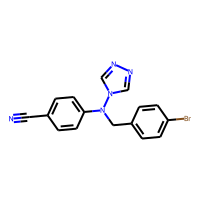
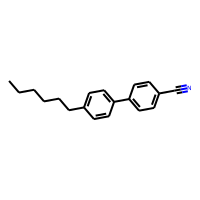
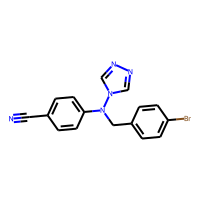
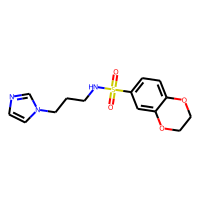
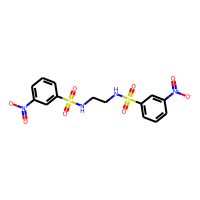
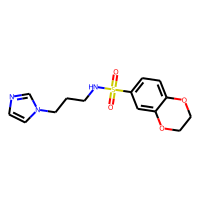
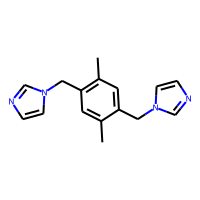
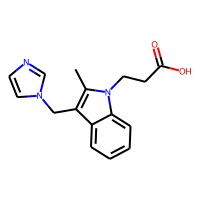
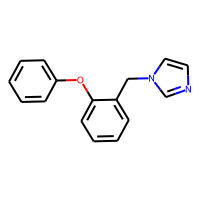
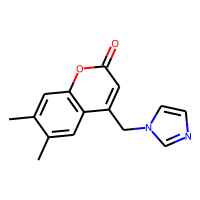
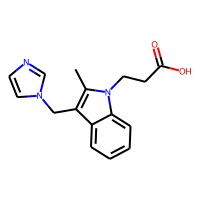
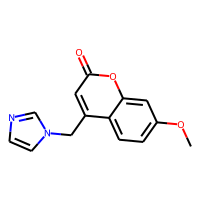
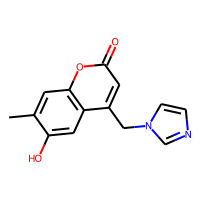
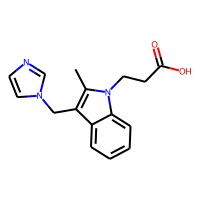
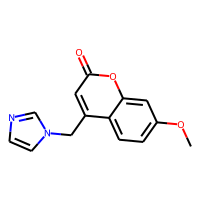
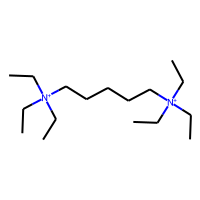
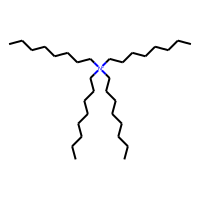
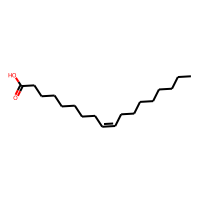
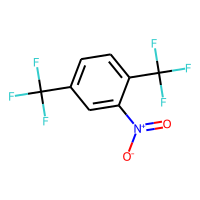
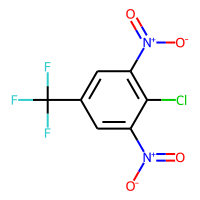
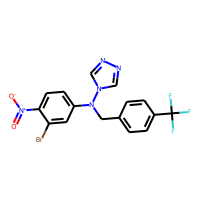
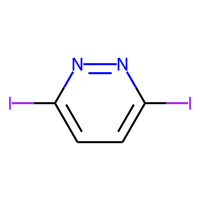
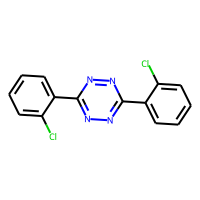
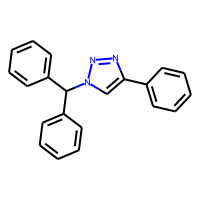
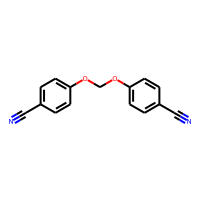
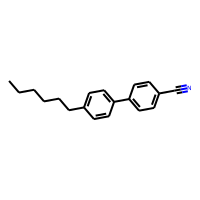
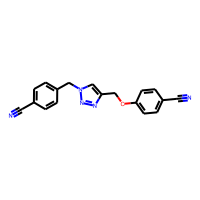
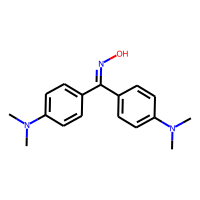
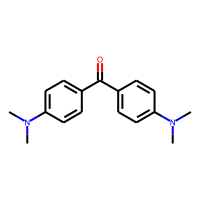
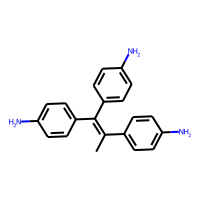

In [527]:
hit_collection_useful_fitered2

In [528]:
print(hit_collection_useful_fitered2.columns)

Index(['index', 'preprocessedSmiles', 'MOLPORTID', 'model1_proba',
       'model2_proba', 'model3_proba', 'model4_proba', 'cluster_id',
       'similairty_chembl', 'closest_chembl_smiles', 'closest_chembl_activity',
       'similairty_pubchem', 'closest_pubchem_smiles',
       'closest_pubchem_activity', 'Molecule_our_predicted_hits',
       'closest_pubchem_smiles_Molecule', 'closest_chembl_smiles_Molecule',
       'mw', 'logP', 'HBA', 'HBD'],
      dtype='object')


In [529]:
hit_collection_useful_fitered2 = hit_collection_useful_fitered2[['preprocessedSmiles', 'Molecule_our_predicted_hits', 'MOLPORTID', 'model1_proba', 'model2_proba', 'model3_proba', 'model4_proba', 'cluster_id', 'similairty_chembl','closest_chembl_smiles', 'closest_chembl_smiles_Molecule', 'closest_chembl_activity', 'similairty_pubchem', 'closest_pubchem_smiles', 'closest_pubchem_smiles_Molecule', 'closest_pubchem_activity', 'mw', 'logP', 'HBA', 'HBD']]

,preprocessedSmiles,Molecule_our_predicted_hits,MOLPORTID,model1_proba,model2_proba,model3_proba,model4_proba,cluster_id,similairty_chembl,closest_chembl_smiles,closest_chembl_smiles_Molecule,closest_chembl_activity,similairty_pubchem,closest_pubchem_smiles,closest_pubchem_smiles_Molecule,closest_pubchem_activity,mw,logP,HBA,HBD
0,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,,MolPort-023-276-728,1.000000,0.694748,0.212,0.561500,596.0,1.000000,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,,active,0.280000,CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1,,Inactive,354.211,3.382,5,0
13,O=S(=O)(NCCCn1ccnc1)c1ccc2c(c1)OCCO2,,MolPort-000-122-979,0.971000,0.745078,0.282,0.247000,593.0,1.000000,O=S(=O)(NCCCn1ccnc1)c1ccc2c(c1)OCCO2,,active,0.293103,O=[N+]([O-])c1cccc(S(=O)(=O)NCCNS(=O)(=O)c2ccc...,,Inactive,323.374,1.023,6,1
19,Cc1cc(Cn2ccnc2)c(C)cc1Cn1ccnc1,,MolPort-002-547-583,0.964000,0.583748,0.808,0.343000,592.0,0.450000,c1ccc(Oc2ccccc2Cn2ccnc2)cc1,,active,0.360000,Cc1c(Cn2ccnc2)c2ccccc2n1CCC(=O)O,,Inactive,266.348,2.793,4,0
20,Cc1cc2oc(=O)cc(Cn3ccnc3)c2cc1C,,MolPort-002-644-642,0.963000,0.587362,0.458,0.333000,47.0,0.653061,COc1ccc2c(Cn3ccnc3)cc(=O)oc2c1,,active,0.350000,Cc1c(Cn2ccnc2)c2ccccc2n1CCC(=O)O,,Inactive,254.289,2.655,4,0
21,Cc1cc2oc(=O)cc(Cn3ccnc3)c2cc1O,,MolPort-002-531-039,0.963000,0.575362,0.318,0.264700,47.0,0.603774,COc1ccc2c(Cn3ccnc3)cc(=O)oc2c1,,active,0.328125,Cc1c(Cn2ccnc2)c2ccccc2n1CCC(=O)O,,Inactive,256.261,2.052,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,CC[N+](CC)(CC)CCCCC[N+](CC)(CC)CC,,MolPort-002-132-290,0.249380,0.479104,0.858,0.289000,52.0,0.161290,CCCCCCCC/C=C\CCCCCCCC(=O)O,,inactive,0.625000,CCCCCCCC[N+](CCCCCCCC)(CCCCCCCC)CCCCCCCC,,Active,272.521,3.910,0,0
990,O=[N+]([O-])c1cc(C(F)(F)F)ccc1C(F)(F)F,,MolPort-001-773-552,0.389686,0.502135,0.857,0.319333,84.0,0.351852,O=[N+]([O-])c1ccc(N(Cc2ccc(C(F)(F)F)cc2)n2cnnc...,,active,0.562500,O=[N+]([O-])c1cc(C(F)(F)F)cc([N+](=O)[O-])c1Cl,,Inactive,259.105,3.632,2,0
991,Ic1ccc(I)nn1,,MolPort-001-764-487,0.158213,0.558362,0.855,0.287450,194.0,0.151515,c1ccc(-c2cn(C(c3ccccc3)c3ccccc3)nn2)cc1,,inactive,0.208333,Clc1ccccc1-c1nnc(-c2ccccc2Cl)nn1,,Inactive,331.882,1.686,2,0
995,N#Cc1ccc(OCOc2ccc(C#N)cc2)cc1,,MolPort-002-891-107,0.549448,0.596000,0.853,0.357642,192.0,0.410256,N#Cc1ccc(Cn2cc(COc3ccc(C#N)cc3)nn2)cc1,,inactive,0.342857,CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1,,Inactive,250.257,2.845,4,0

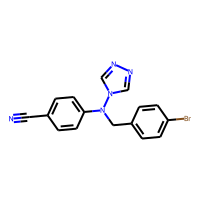
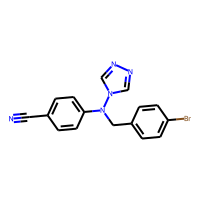
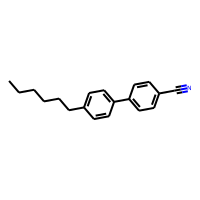
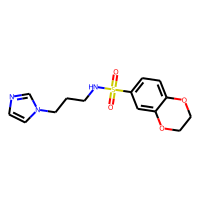
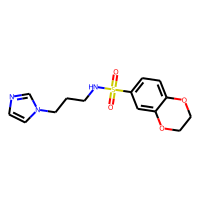
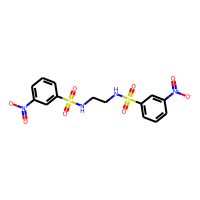
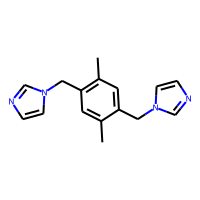
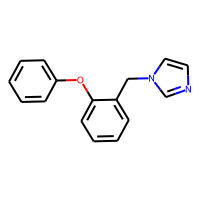
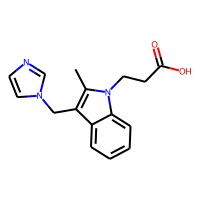
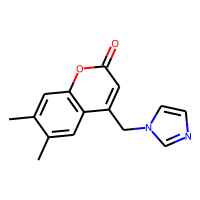
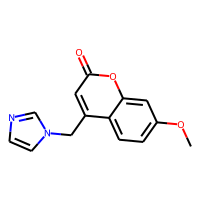
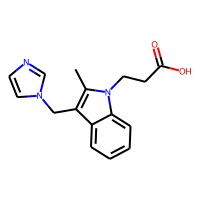
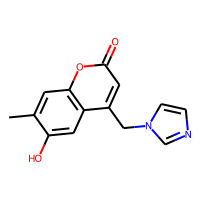
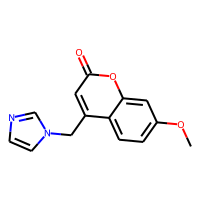
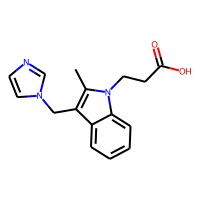
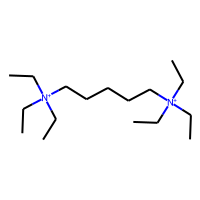
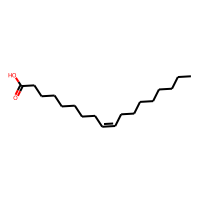
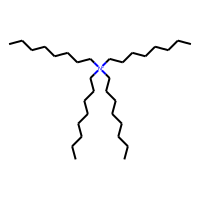
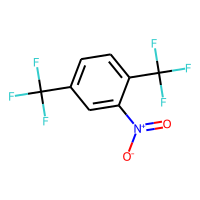
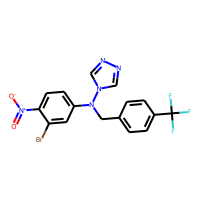
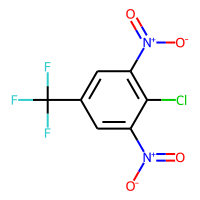
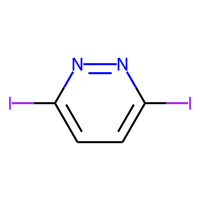
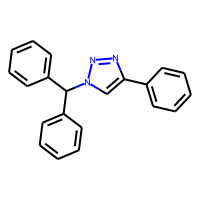
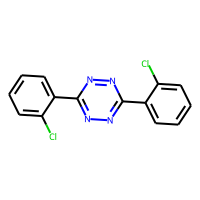
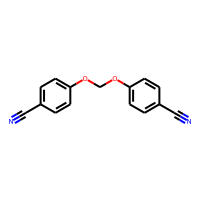
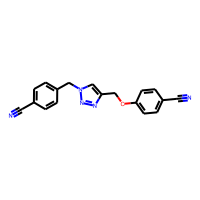
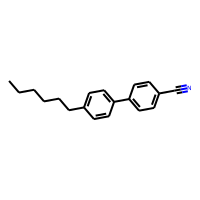
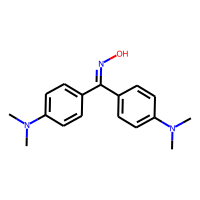
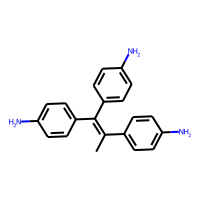
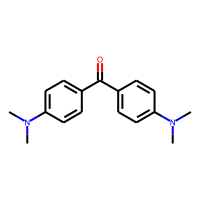

In [530]:
hit_collection_useful_fitered2

In [531]:
hit_collection_useful_fitered2 = hit_collection_useful_fitered2.sort_values('cluster_id', ascending=False)

,preprocessedSmiles,Molecule_our_predicted_hits,MOLPORTID,model1_proba,model2_proba,model3_proba,model4_proba,cluster_id,similairty_chembl,closest_chembl_smiles,closest_chembl_smiles_Molecule,closest_chembl_activity,similairty_pubchem,closest_pubchem_smiles,closest_pubchem_smiles_Molecule,closest_pubchem_activity,mw,logP,HBA,HBD
0,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,,MolPort-023-276-728,1.000000,0.694748,0.212,0.5615,596.0,1.000000,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,,active,0.280000,CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1,,Inactive,354.211,3.382,5,0
13,O=S(=O)(NCCCn1ccnc1)c1ccc2c(c1)OCCO2,,MolPort-000-122-979,0.971000,0.745078,0.282,0.2470,593.0,1.000000,O=S(=O)(NCCCn1ccnc1)c1ccc2c(c1)OCCO2,,active,0.293103,O=[N+]([O-])c1cccc(S(=O)(=O)NCCNS(=O)(=O)c2ccc...,,Inactive,323.374,1.023,6,1
19,Cc1cc(Cn2ccnc2)c(C)cc1Cn1ccnc1,,MolPort-002-547-583,0.964000,0.583748,0.808,0.3430,592.0,0.450000,c1ccc(Oc2ccccc2Cn2ccnc2)cc1,,active,0.360000,Cc1c(Cn2ccnc2)c2ccccc2n1CCC(=O)O,,Inactive,266.348,2.793,4,0
29,O=c1cc(Cn2ccnc2)c2cc3c(cc2o1)CCC3,,MolPort-002-645-393,0.952000,0.588816,0.450,0.3300,591.0,0.584906,COc1ccc2c(Cn3ccnc3)cc(=O)oc2c1,,active,0.272727,Cc1c(Cn2ccnc2)c2ccccc2n1CCC(=O)O,,Inactive,266.300,2.527,4,0
30,C=C1C=C[C@@]2(C)C(=C1)CCC1C2CC[C@]2(C)C(=O)CCC12,,MolPort-002-509-332,0.951000,0.578955,0.801,0.4280,590.0,0.790698,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@]2(C)C...,,active,0.588235,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,,Active,282.427,4.851,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,CCC(C)(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC3CC(O)CC...,,MolPort-009-675-646,0.319619,0.400041,0.924,0.5040,1.0,0.259259,CCC(CC)(C(=O)OC1CC2CC([C@@H]1C)C2(C)C)c1ccncc1,,inactive,1.000000,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,,Inactive,418.574,4.586,5,1
859,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,,MolPort-021-783-327,0.319619,0.400041,0.924,0.5040,1.0,0.259259,CCC(CC)(C(=O)OC1CC2CC([C@@H]1C)C2(C)C)c1ccncc1,,inactive,1.000000,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,,Inactive,418.574,4.586,5,1
860,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,,MolPort-003-850-248,0.319619,0.400041,0.924,0.5040,1.0,0.259259,CCC(CC)(C(=O)OC1CC2CC([C@@H]1C)C2(C)C)c1ccncc1,,inactive,1.000000,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,,Inactive,418.574,4.586,5,1
861,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,,MolPort-002-507-345,0.319619,0.400041,0.924,0.5040,1.0,0.259259,CCC(CC)(C(=O)OC1CC2CC([C@@H]1C)C2(C)C)c1ccncc1,,inactive,1.000000,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,,Inactive,418.574,4.586,5,1

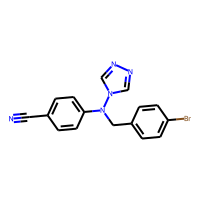
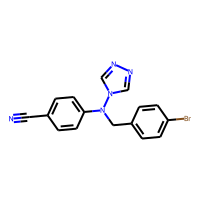
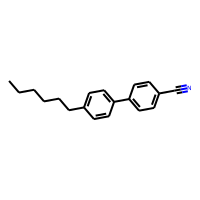
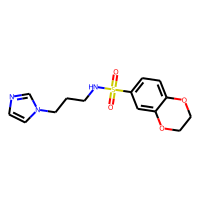
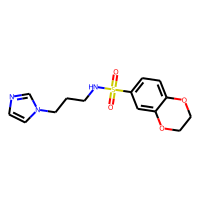
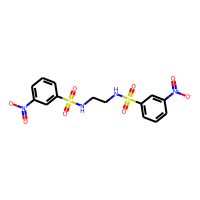
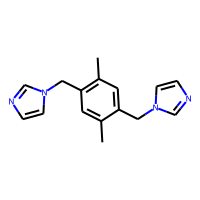
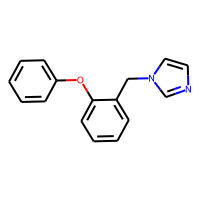
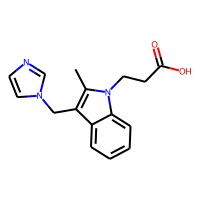
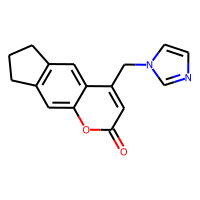
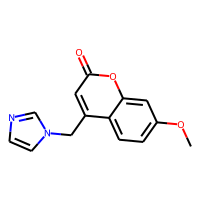
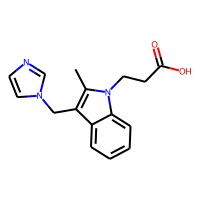
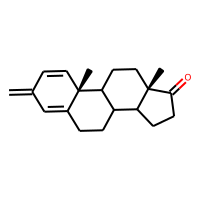
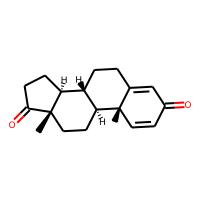
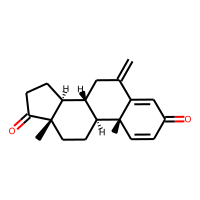
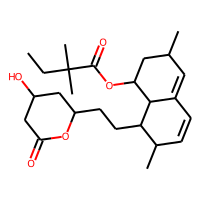
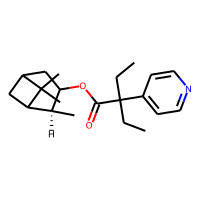
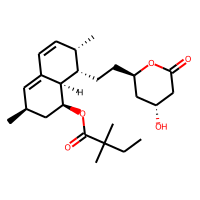
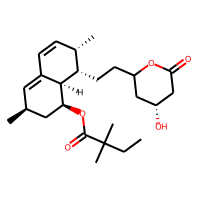
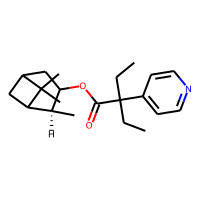
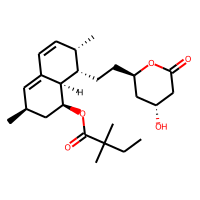
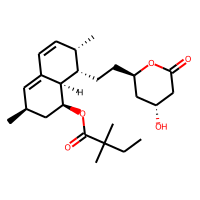
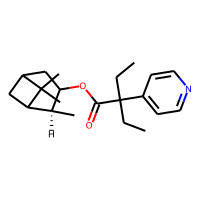
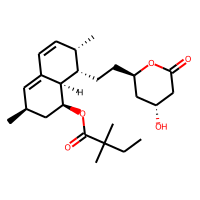
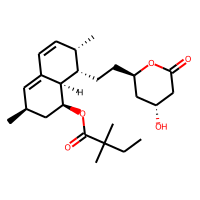
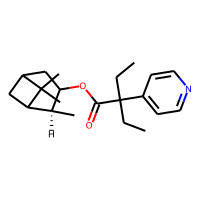
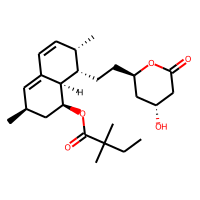
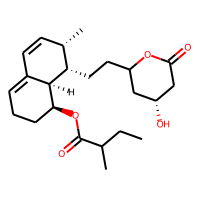
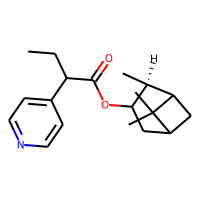
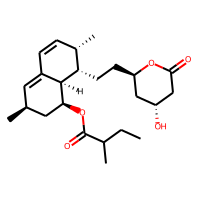

In [532]:
hit_collection_useful_fitered2

In [533]:
hit_collection_useful_fitered2.to_csv('screen_probability_top_similarity_top250.csv',index=False)